In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

from models import BinaryLogisticRegression, MultiLogisticRegression

# EDA

Khám phá dữ liệu

In [2]:
df = sns.load_dataset("titanic")
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [3]:
"""
pandas.dropna():
    - axis: 0 if rows, 1 if columns
    - how: any drops when one na represents, all drops when all na represent
"""
df = df.dropna(axis = 0, how = "any").reset_index()
df.head(2)

,index,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
1,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False


In [4]:
df = df.drop_duplicates().reset_index()

In [5]:
df.head(5)

,level_0,index,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
1,1,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
2,2,6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
3,3,10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
4,4,11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [6]:
cols = df.columns
print(cols)

Index(['level_0', 'index', 'survived', 'pclass', 'sex', 'age', 'sibsp',
       'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck',
       'embark_town', 'alive', 'alone'],
      dtype='object')


In [7]:
y = ["survived", "alive"]
x = [col for col in cols if col not in y]

In [8]:
dfx = df[x]
dfy = df[y]

dfx.head()

,level_0,index,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False
1,1,3,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False
2,2,6,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,True
3,3,10,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,False
4,4,11,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,True


In [9]:
dfy.head()

,survived,alive
0,1,yes
1,1,yes
2,0,no
3,1,yes
4,1,yes


In [10]:
dfx = dfx.drop(columns = ["embark_town", "level_0", "index", "class", "adult_male"])
dfy = dfy.drop(columns = ["alive"])

In [11]:
dfx["sex_who"] = dfx["sex"] + dfx["who"]
dfx = dfx.drop(columns = ["sex", "who"])
dfx.head()

,pclass,age,sibsp,parch,fare,embarked,deck,alone,sex_who
0,1,38.0,1,0,71.2833,C,C,False,femalewoman
1,1,35.0,1,0,53.1000,S,C,False,femalewoman
2,1,54.0,0,0,51.8625,S,E,True,maleman
3,3,4.0,1,1,16.7000,S,G,False,femalechild
4,1,58.0,0,0,26.5500,S,C,True,femalewoman


In [12]:
"""
Embarked: Nominal data: Dữ liệu category không có thứ tự
sex_who: Nominal data: Dữ liệu category không có thứ tự
Deck: Nominal data: Dữ liệu category không có thứ tự

Alone: Binary data: Dữ liệu True/False
"""

from sklearn.preprocessing import LabelEncoder

for col in ["embarked", "sex_who", "deck"]:
    le = LabelEncoder()
    dfx[col] = le.fit_transform(dfx[col])

dfx["alone"] = dfx["alone"].astype(int)

dfx.head()

,pclass,age,sibsp,parch,fare,embarked,deck,alone,sex_who
0,1,38.0,1,0,71.2833,0,2,0,1
1,1,35.0,1,0,53.1000,2,2,0,1
2,1,54.0,0,0,51.8625,2,4,1,3
3,3,4.0,1,1,16.7000,2,6,0,0
4,1,58.0,0,0,26.5500,2,2,1,1


In [13]:
from sklearn.preprocessing import StandardScaler

for col in ["age", "fare"]:
    sc = StandardScaler()
    dfx[col] = sc.fit_transform(dfx[col].to_numpy().reshape((-1, 1)))

dfx.head()


,pclass,age,sibsp,parch,fare,embarked,deck,alone,sex_who
0,1,0.152082,1,0,-0.100110,0,2,0,1
1,1,-0.039875,1,0,-0.338485,2,2,0,1
2,1,1.175852,0,0,-0.354708,2,4,1,3
3,3,-2.023430,1,1,-0.815672,2,6,0,0
4,1,1.431795,0,0,-0.686543,2,2,1,1


In [14]:
X = dfx.to_numpy()
y = dfy.to_numpy()

In [15]:
X.shape

(182, 9)

In [16]:
y.shape

(182, 1)

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Test Algorithms

In [18]:
from sklearn.linear_model import LogisticRegression

lr = BinaryLogisticRegression.BinaryLogisticRegression(
    input_shape = x_train[0].shape,
    lr = 0.02,
    epochs = 250
)

clf = LogisticRegression(max_iter=1000)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6474 - loss: 0.6615 - val_accuracy: 0.6897 - val_loss: 0.5347
Epoch 2/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7028 - loss: 0.6386 - val_accuracy: 0.7241 - val_loss: 0.5368
Epoch 3/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6569 - loss: 0.6739 - val_accuracy: 0.7241 - val_loss: 0.5366
Epoch 4/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6911 - loss: 0.6337 - val_accuracy: 0.7586 - val_loss: 0.5346
Epoch 5/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6627 - loss: 0.6884 - val_accuracy: 0.6897 - val_loss: 0.5364
Epoch 6/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6929 - loss: 0.6258 - val_accuracy: 0.6897 - val_loss: 0.5358
Epoch 7/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6979 - loss: 0.6587 - val_accuracy: 0.7241 - val_loss: 0.5357
Epoch 8/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6398 - loss: 0.6936 - val_accuracy: 0.6897 - val_loss: 0.5427

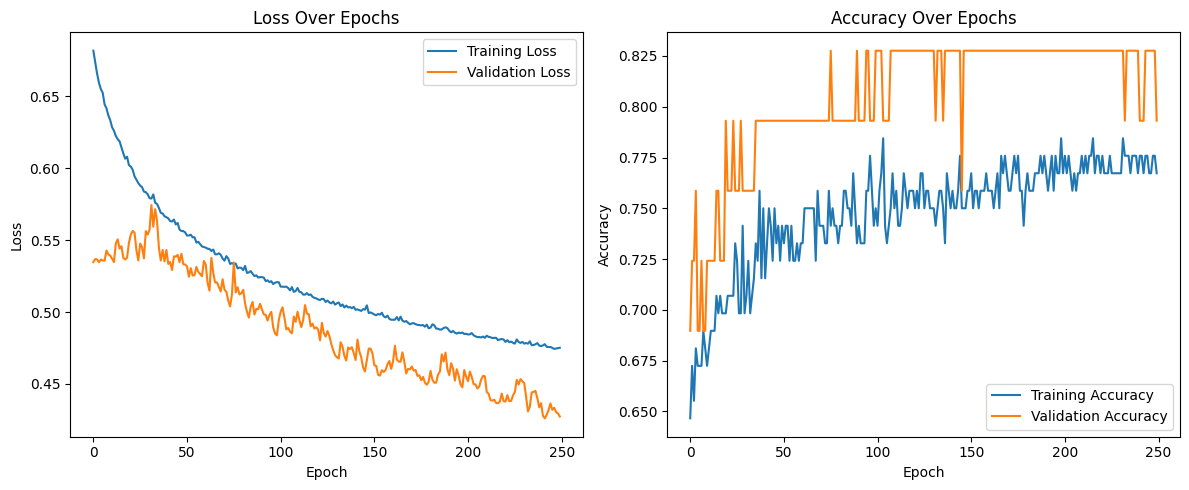

d:\AppData\miniconda3\envs\cluster\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [19]:
lr = lr.fit(x_train, y_train)
clf.fit(x_train, y_train)

In [82]:
multi_lr = MultiLogisticRegression.MultiLogisticRegression(
    input_shape = x_train[0].shape,
    lr = 0.02,
    epochs = 250
)

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305 (1.19 KB)

 Trainable params: 305 (1.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5025 - loss: 0.7369 - val_accuracy: 0.4483 - val_loss: 0.7568
Epoch 2/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5469 - loss: 0.7102 - val_accuracy: 0.5172 - val_loss: 0.7169
Epoch 3/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5558 - loss: 0.7034 - val_accuracy: 0.5862 - val_loss: 0.6696
Epoch 4/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6191 - loss: 0.6575 - val_accuracy: 0.5862 - val_loss: 0.6708
Epoch 5/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6279 - loss: 0.6223 - val_accuracy: 0.5862 - val_loss: 0.6447
Epoch 6/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6975 - loss: 0.5832 - val_accuracy: 0.6207 - val_loss: 0.6414
Epoch 7/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6286 - loss: 0.6152 - val_accuracy: 0.6552 - val_loss: 0.6135
Epoch 8/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7090 - loss: 0.5889 - val_accuracy: 0.6207 - val_loss: 0.6035
Epoch

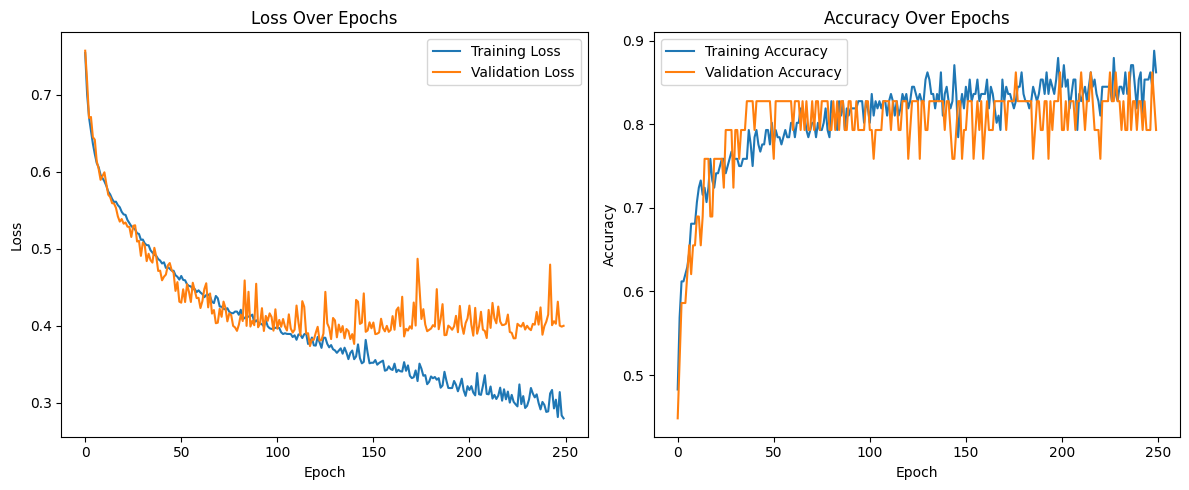

In [83]:
multi_lr.fit(x_train, y_train)

In [ ]:
multi_y_prob = multi_lr.predict(x_test)
multi_y_pred = (multi_y_prob > 0.5).astype(int)

accuracy_multi_lr = accuracy_score(y_test, multi_y_pred)
precision_multi_lr = precision_score(y_test, multi_y_pred)
recall_multi_lr = recall_score(y_test, multi_y_pred)
f1_multi_lr = f1_score(y_test, multi_y_pred)
auc_multi_lr = roc_auc_score(y_test, multi_y_prob)

# ---------------------------------------------------------

y_prob = lr.predict(x_test)
y_pred = (y_prob > 0.5).astype(int)

accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)
auc_lr = roc_auc_score(y_test, y_prob)

# ----------------------------------------------------------
y_pred_sklearn = clf.predict(x_test)
y_prob_sklearn = clf.predict_proba(x_test)[:, 1]

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)
f1_sklearn = f1_score(y_test, y_pred_sklearn)
auc_sklearn = roc_auc_score(y_test, y_prob_sklearn)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [85]:
# In bảng markdown
md_table = f"""
| Metric        | lr          | multi_lr    | sklearn     |
|---------------|-------------|-------------|-------------|
| **Accuracy**  | {accuracy_lr:.4f} | {accuracy_multi_lr:.4f} | {accuracy_sklearn:.4f} |
| **Precision** | {precision_lr:.4f} | {precision_multi_lr:.4f} | {precision_sklearn:.4f} |
| **Recall**    | {recall_lr:.4f}   | {recall_multi_lr:.4f}   | {recall_sklearn:.4f}   |
| **F1 Score**  | {f1_lr:.4f}       | {f1_multi_lr:.4f}       | {f1_sklearn:.4f}       |
| **AUC-ROC**   | {auc_lr:.4f}      | {auc_multi_lr:.4f}      | {auc_sklearn:.4f}      |
"""

print(md_table)


| Metric        | lr          | multi_lr    | sklearn     |
|---------------|-------------|-------------|-------------|
| **Accuracy**  | 0.6757 | 0.7027 | 0.5946 |
| **Precision** | 0.8333 | 0.8421 | 0.6957 |
| **Recall**    | 0.6250   | 0.6667   | 0.6667   |
| **F1 Score**  | 0.7143       | 0.7442       | 0.6809       |
| **AUC-ROC**   | 0.6827      | 0.7276      | 0.6891      |



| Metric        | lr          | multi_lr    | sklearn     |
|---------------|-------------|-------------|-------------|
| **Accuracy**  | 0.6757 | 0.7027 | 0.5946 |
| **Precision** | 0.8333 | 0.8421 | 0.6957 |
| **Recall**    | 0.6250   | 0.6667   | 0.6667   |
| **F1 Score**  | 0.7143       | 0.7442       | 0.6809       |
| **AUC-ROC**   | 0.6827      | 0.7276      | 0.6891      |
